# STUDENT PERFORMANCE  Dataset

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# ganti nama columns
df.columns = ['gender','race','parent_edu','lunch','prep_course','math','reading','writing']

In [7]:
df.head()

,gender,race,parent_edu,lunch,prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# BAR PLOT

In [8]:
# buat dataframe baru
df_gender = df.groupby(['gender']).mean()
df_gender

,math,reading,writing
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [9]:
# mengambil data categorical gender
df['gender'].unique().tolist()

# bisa juga ga usah di-tolist()
# akan digunakan sbg x label  

['female', 'male']

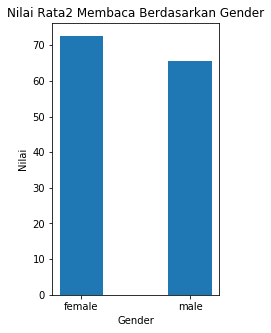

In [10]:
# bar: untuk membuat barplot vertical

plt.figure(figsize=(3,5))

plt.bar(df['gender'].unique().tolist(), df_gender['reading'], width=0.4)
plt.xlabel('Gender')
plt.ylabel('Nilai')
plt.title('Nilai Rata2 Membaca Berdasarkan Gender')
plt.show()

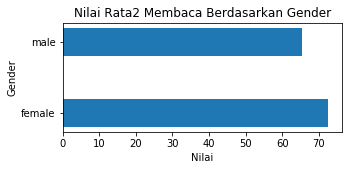

In [11]:
# barh : untuk barplot horizontal

plt.figure(figsize=(5,2))

plt.barh(df['gender'].unique().tolist(), df_gender['reading'], height=0.4)
plt.xlabel('Nilai')
plt.ylabel('Gender')
plt.title('Nilai Rata2 Membaca Berdasarkan Gender')
plt.show()

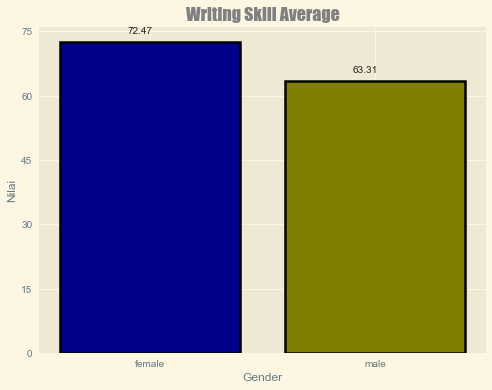

In [28]:
plt.figure(figsize=(8,6))
plt.style.use('Solarize_Light2')
barplot = plt.bar(df['gender'].unique(), df_gender['writing'],
    color=['darkblue','olive'], # warna bar
    edgecolor='k',linewidth=2.5) # warna dam ketebalan border

plt.xlabel('Gender')
plt.ylabel('Nilai')
plt.title('Writing Skill Average', fontdict={'family':'Impact', 'size':18, 'color':'gray'})
plt.yticks(np.arange(0,90,15))

# menambahkan keterangan di atas bar
for i,j in enumerate (barplot):
    plt.text(j.get_x()+0.3, j.get_height()+2, round(df_gender['writing'].iloc[i],2))
    fontdict={'family':'Calibri', 'size':20, 'color':'black'},
    bbox = dict(facecolor='white')

plt.show()

In [13]:
df_parent_edu = df.groupby(['parent_edu','prep_course']).count()
df_parent_edu

gender  race  lunch  math  reading  writing
parent_edu         prep_course                                             
associate's degree completed        82    82     82    82       82       82
                   none            140   140    140   140      140      140
bachelor's degree  completed        46    46     46    46       46       46
                   none             72    72     72    72       72       72
high school        completed        56    56     56    56       56       56
                   none            140   140    140   140      140      140
master's degree    completed        20    20     20    20       20       20
                   none             39    39     39    39       39       39
some college       completed        77    77     77    77       77       77
                   none            149   149    149   149      149      149
some high school   completed        77    77     77    77       77       77
                   none            102   102    102   102      102      102

In [14]:
df_parent_edu['race'].tolist()

[82, 140, 46, 72, 56, 140, 20, 39, 77, 149, 77, 102]

In [15]:
data = df_parent_edu['race'].tolist()
completed = data[0::2]
none = data[1::2]

In [16]:
completed

[82, 46, 56, 20, 77, 77]

In [17]:
none

[140, 72, 140, 39, 149, 102]

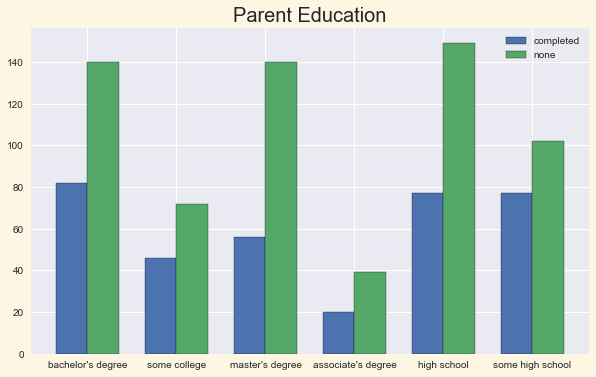

In [18]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')

N = len(completed)

ind = np.arange(N) # x tick
width = 0.35 # lebar bar

# bar untuk data completed
plt.bar(x=ind, height=completed, width=width, label='completed', edgecolor='k') 

# bar untuk data none
plt.bar(x=ind+width, height=none, width=width, label='none', edgecolor='k')

plt.xticks(ind + width/2, df['parent_edu'].unique())
plt.legend(loc=0)
plt.title('Parent Education', size=20)
plt.show()

# PIE CHART

untuk proporsi

In [19]:
df_race = df.groupby('race').mean()
df_race

,math,reading,writing
race,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [20]:
labels = df['race'].unique()
labels

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

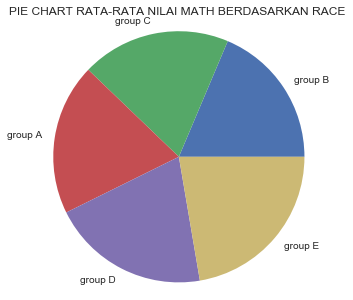

In [21]:
plt.figure(figsize=(5,5))
plt.pie(df_race['math'], labels=labels)
plt.axis('equal')
plt.title('PIE CHART RATA-RATA NILAI MATH BERDASARKAN RACE')
plt.show()

In [22]:
df_parent = df.groupby('parent_edu').count()
df_parent

,gender,race,lunch,prep_course,math,reading,writing
parent_edu,,,,,,,
associate's degree,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179


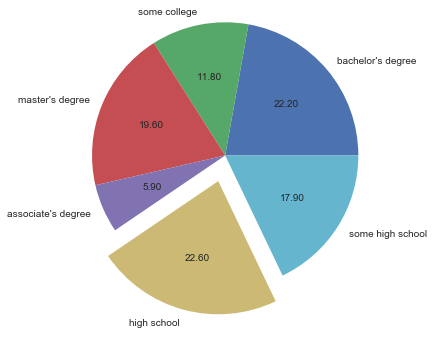

In [23]:
explode = (0, 0, 0, 0, 0.2, 0) # mengeluarkan bagian dari pie

plt.figure(figsize=(6,6))
plt.pie(df_parent['gender'], labels=df['parent_edu'].unique(),
    autopct = '%.2f', # menampilkan persentase pie slice
    explode=explode) # jarak antar slice

plt.axis('equal') # memastikan aja bentuknya bulet
plt.show()